In [1]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
from specim.specfuncs import spec1d

### The following is the part of the deflector spectrum of J1433 which I have used for velocity dispersion calculation and going to report.

In [2]:
spec = Veldis('../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_coadd2d_three_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[3800, 15970])


Reading spectrum from ../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_coadd2d_three_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  5253.10
 Spectrum End:     8340.73
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.25




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5276.25
[Fe VII]      3761.40       5292.29
H-iota        3770.00       5304.39
H-theta       3797.00       5342.38
H-eta         3835.00       5395.85
CN bandhd     3883.00       5463.38
CaII K        3933.67       5534.67
CaII H        3968.47       5583.64
H-delta       4101.00       5770.11
G-band        4305.00       6057.14
H-gamma       4340.00       6106.38
Fe4383        4383.00       6166.88
Ca4455        4455.00       6268.19
Fe4531        4531.00       6375.12
H-beta        4861.00       6839.43
Mg I (b)      5176.00       7282.63
Na I (D)      5889.95       8287.16
Na I (D)      5895.92       8295.56


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-delta       4101.00       5770.11
H-gamma       4340.00       6106.38
H-beta        4861.00       6839.43
[O III]       4962.00       6981.53
[O III]       5007.00       7044.85
[N I]         5199.00  

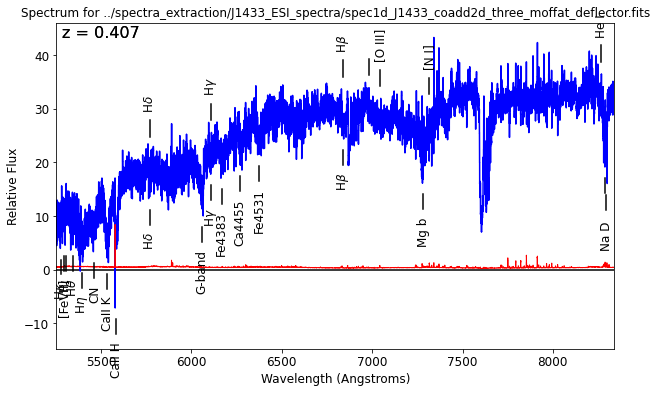

In [3]:
#%matplotlib notebook
fg = plt.figure(figsize=(10,6))
spec.smooth(3, fig=fg)
spec.mark_lines('abs', z=0.407, usesmooth=True)
spec.mark_lines('em', z=0.407, usesmooth=True)

### Rest framed the wavelength range. Also noise is scaled such that the chi square value for each fit is around 1.


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389945 km/s


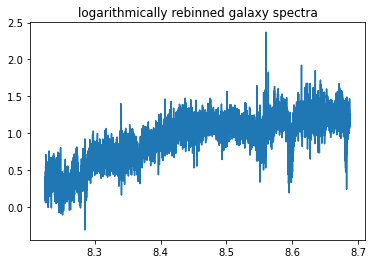

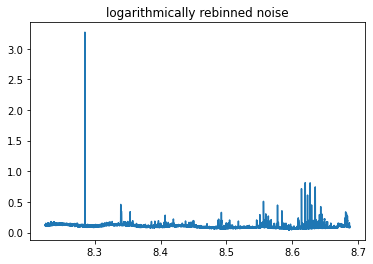

In [4]:
spec.cal_parm(z=0.407, high_z=True, logscale=True, veldis_start=200, noise_scale=0.1)

In [5]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.2)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -22378.181994 

sigma_diff : 1.578741


## We only mask two atmospheric absorption lines and a line in Ca H.

In [6]:
mask_reg = np.log(np.array([(5574, 5580), (6860, 6995),  (7562, 7805)])/1.407)
print(mask_reg) #(7274, 7278), (7338, 7346), (7357, 7360),

[[8.28440843 8.28548428]
 [8.49200294 8.51149111]
 [8.58943121 8.62106005]]



degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        27       275
chi2/DOF: 1.145; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:        28       276
chi2/DOF: 1.144; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  23 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:        28       275
chi2/DOF: 1.144; degree = 7; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  23 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:        29       272
chi2/DOF: 1.143; degree = 8; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 1268

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:       

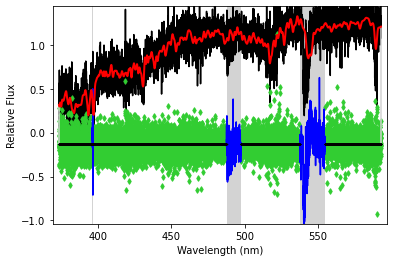

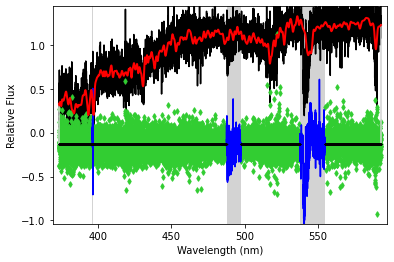

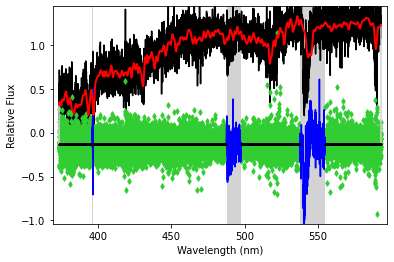

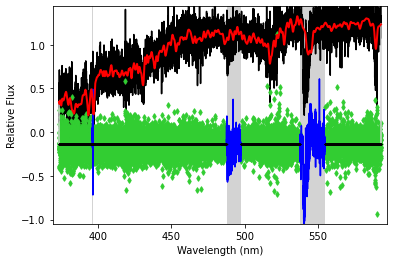

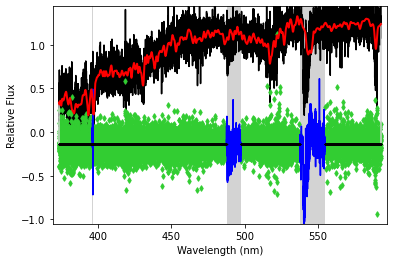

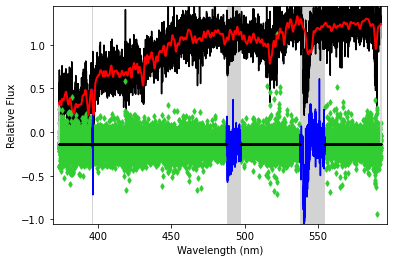

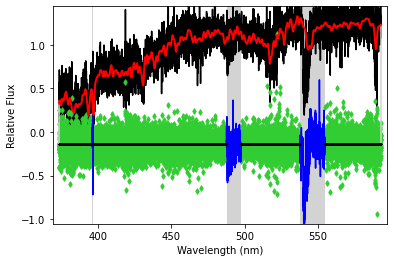

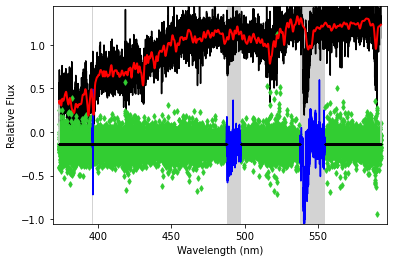

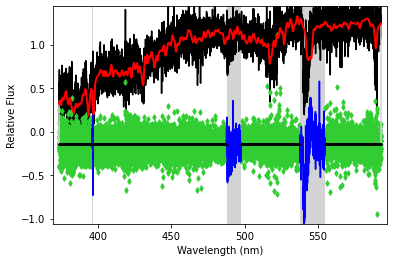

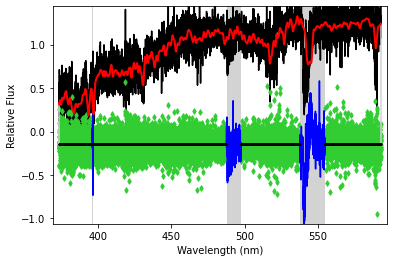

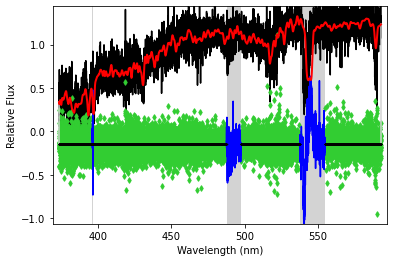

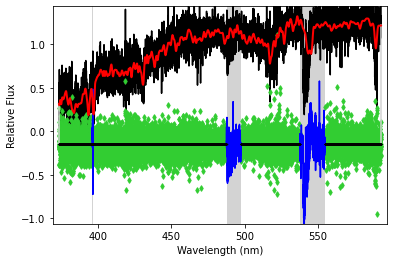

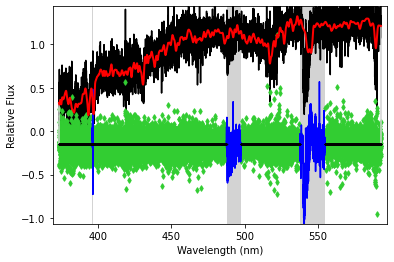

<Figure size 432x288 with 0 Axes>

In [7]:
spec.cal_veldis(temp_spec=temp_spec, degree=[5, 18], mask_reg=mask_reg, show_weight=True, moments=2)

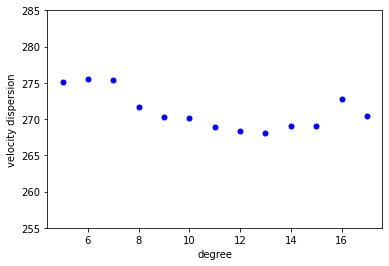

In [8]:
spec.plot_veldis(ylim=[255, 285])

order : 8


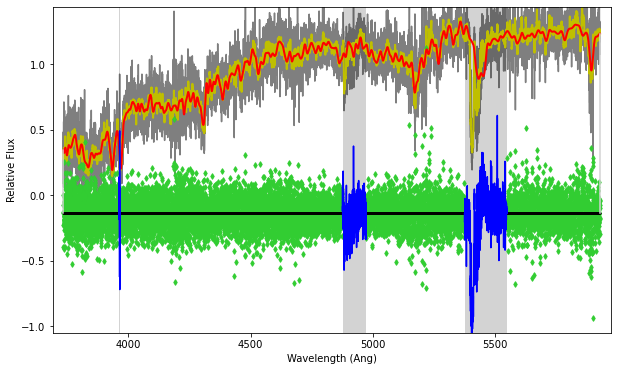

order : 16


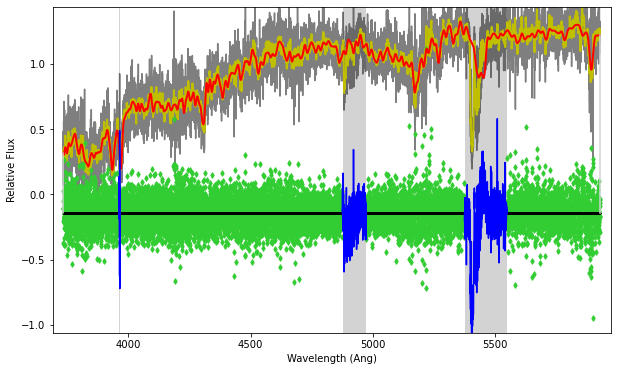

In [9]:
ord_list = np.array([8, 16])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

## Blue side

In [14]:
spec_b = Veldis('../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_coadd2d_three_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[3800, 10550])


Reading spectrum from ../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_coadd2d_three_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  5253.10
 Spectrum End:     6788.50
 Dispersion (1st pixel):   0.20
 Dispersion (average):      0.23




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5276.25
[Fe VII]      3761.40       5292.29
H-iota        3770.00       5304.39
H-theta       3797.00       5342.38
H-eta         3835.00       5395.85
CN bandhd     3883.00       5463.38
CaII K        3933.67       5534.67
CaII H        3968.47       5583.64
H-delta       4101.00       5770.11
G-band        4305.00       6057.14
H-gamma       4340.00       6106.38
Fe4383        4383.00       6166.88
Ca4455        4455.00       6268.19
Fe4531        4531.00       6375.12



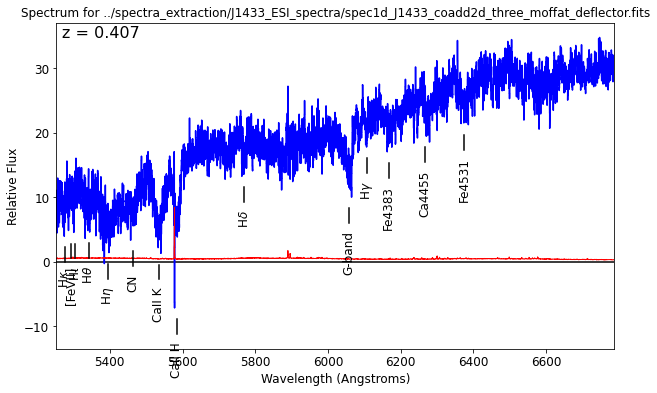

In [15]:
#%matplotlib notebook
fg = plt.figure(figsize=(10,6))
spec_b.smooth(3, fig=fg)
spec_b.mark_lines('abs', z=0.407, usesmooth=True)
#spec.mark_lines('em', z=0.407, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389930 km/s


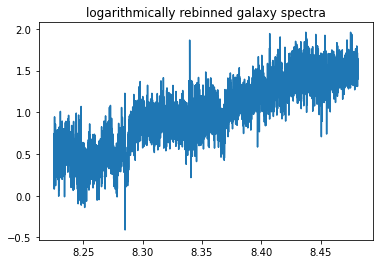

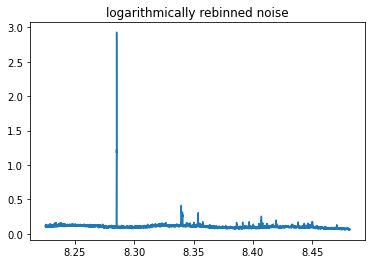

In [16]:
spec_b.cal_parm(z=0.407, high_z=True, logscale=True, veldis_start=200, noise_scale=0.1)

In [17]:
temp_spec_b = spec_b.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.2)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -22378.181994 

sigma_diff : 1.578741


In [ ]:
mask_reg_b = np.log(np.array([(5574, 5580), (6860, 6995),  (7562, 7805)])/1.407)
print(mask_reg_b) #(7274, 7278), (7338, 7346), (7357, 7360),


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        30       255
chi2/DOF: 2.194; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  19 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:        30       253
chi2/DOF: 2.193; degree = 6; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  19 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:        31       253
chi2/DOF: 2.193; degree = 7; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  22 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:        31       253
chi2/DOF: 2.193; degree = 8; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  22 / 1268

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:        29

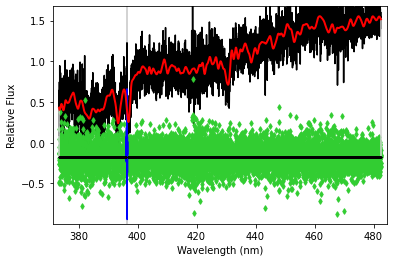

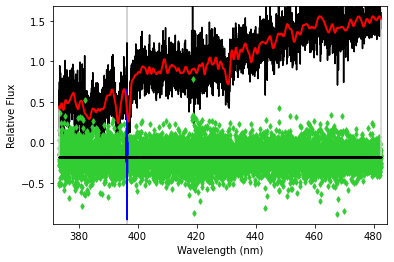

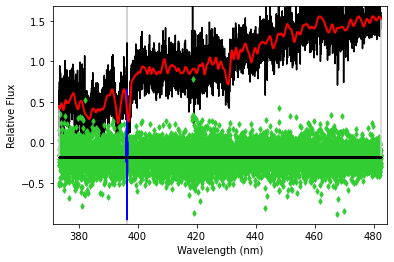

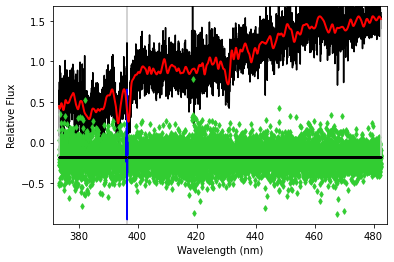

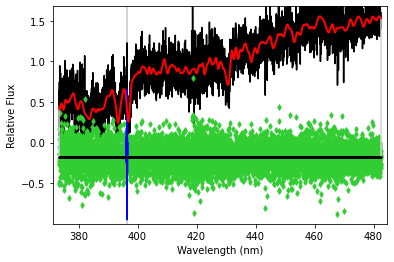

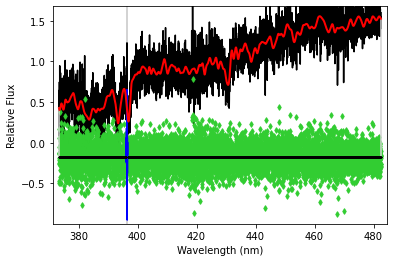

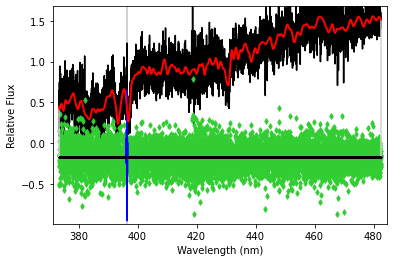

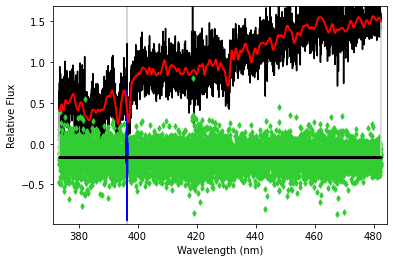

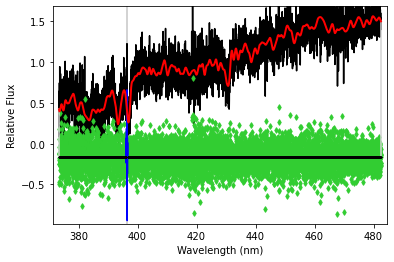

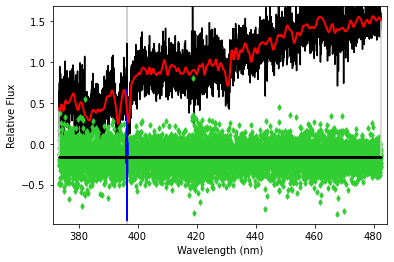

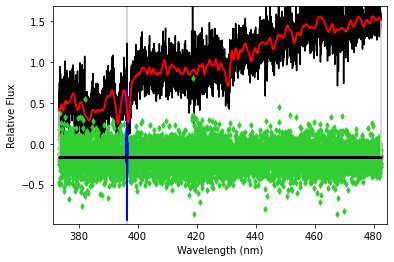

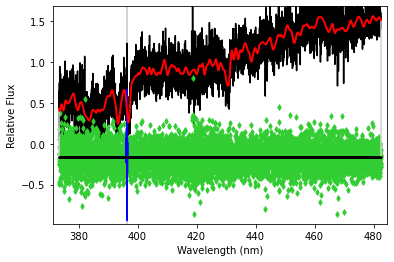

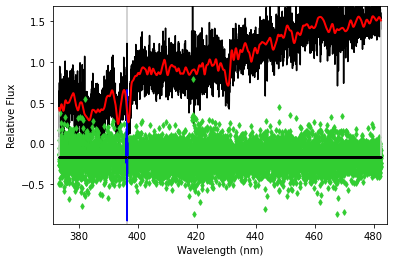

<Figure size 432x288 with 0 Axes>

In [18]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[5, 18], mask_reg=mask_reg, show_weight=True, moments=2)

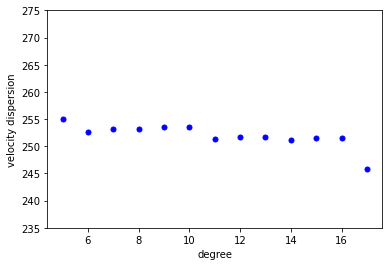

In [20]:
spec_b.plot_veldis(ylim=[235, 275])

order : 8


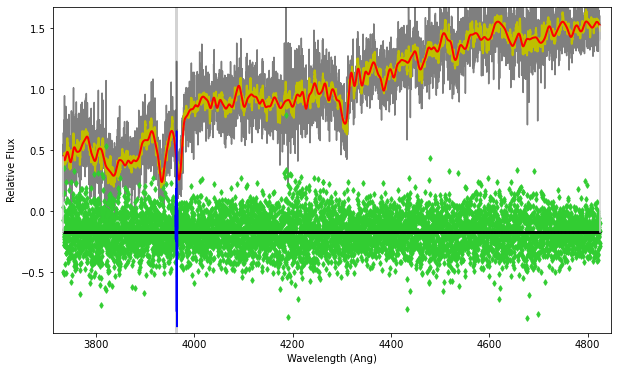

order : 12


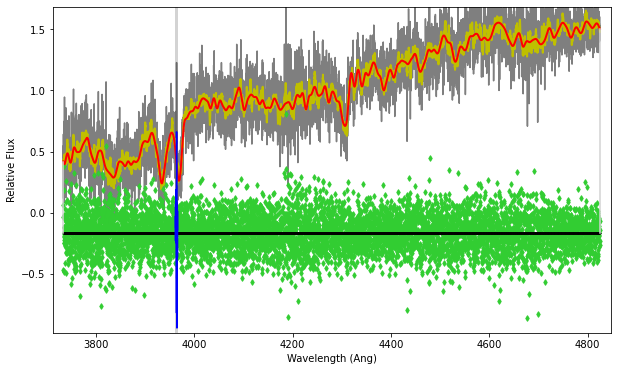

order : 16


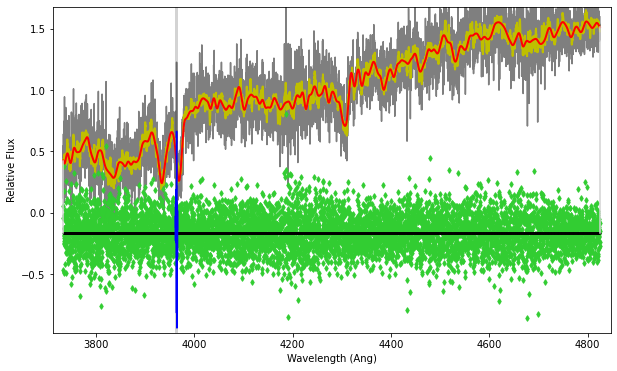

In [21]:
ord_list = np.array([8, 12, 16])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_b.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

## Red side

In [22]:
spec_r = Veldis('../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_coadd2d_three_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[10551, 15970])


Reading spectrum from ../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_coadd2d_three_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  6789.02
 Spectrum End:     8340.73
 Dispersion (1st pixel):   0.26
 Dispersion (average):      0.29




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       6839.43
Mg I (b)      5176.00       7282.63
Na I (D)      5889.95       8287.16
Na I (D)      5895.92       8295.56



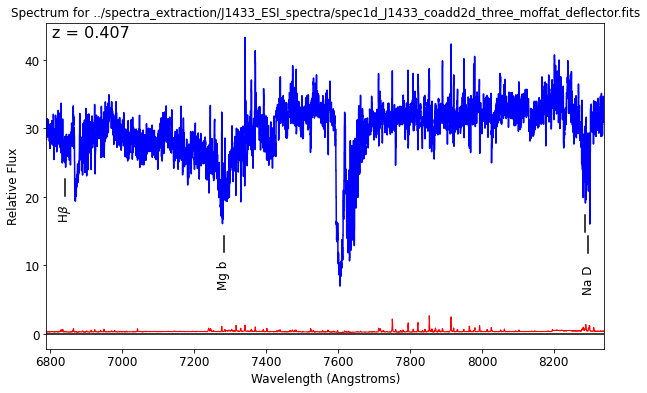

In [23]:
#%matplotlib notebook
fg = plt.figure(figsize=(10,6))
spec_r.smooth(3, fig=fg)
spec_r.mark_lines('abs', z=0.407, usesmooth=True)
#spec.mark_lines('em', z=0.407, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389926 km/s


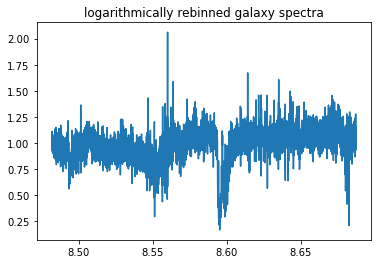

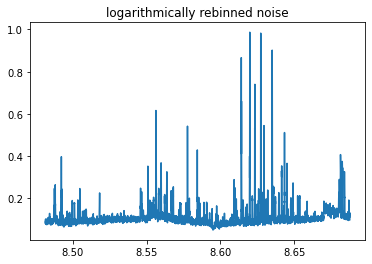

In [24]:
spec_r.cal_parm(z=0.407, high_z=True, logscale=True, veldis_start=200, noise_scale=0.1)

In [32]:
temp_spec_r = spec_r.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.2)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -99271.472093 

sigma_diff : 1.578741


In [ ]:
mask_reg = np.log(np.array([(5574, 5580), (6860, 6995),  (7562, 7805)])/1.407)
print(mask_reg) #(7274, 7278), (7338, 7346), (7357, 7360),


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        12       274
chi2/DOF: 0.7013; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:        12       274
chi2/DOF: 0.7013; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:        15       280
chi2/DOF: 0.7010; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:        15       279
chi2/DOF: 0.7010; degree = 8; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1268

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:   

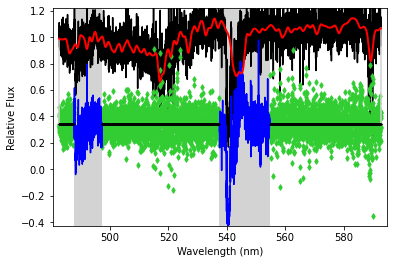

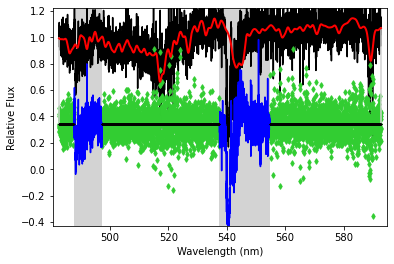

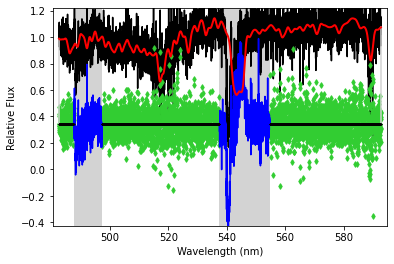

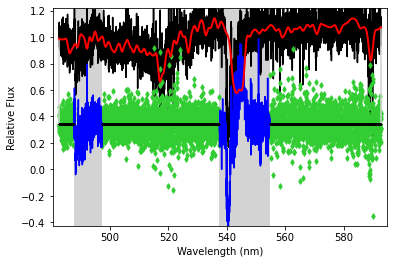

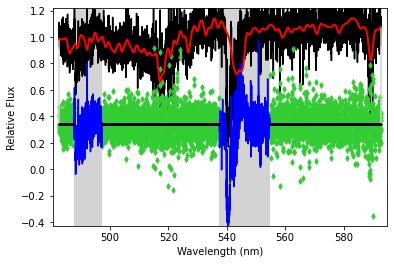

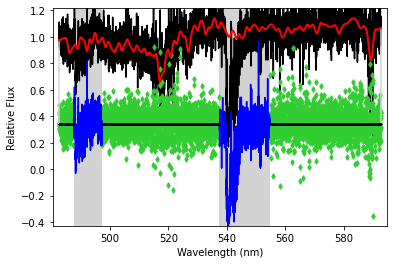

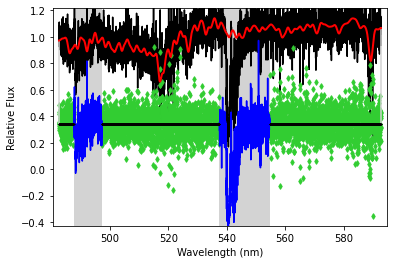

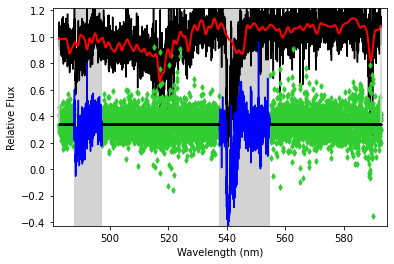

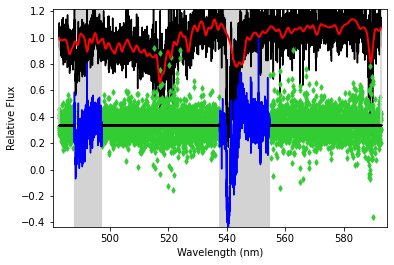

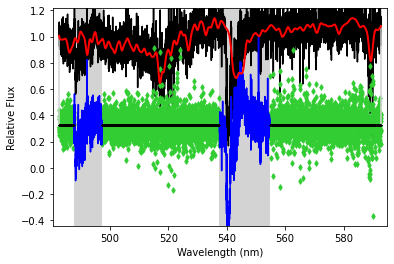

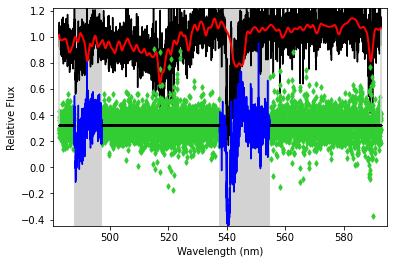

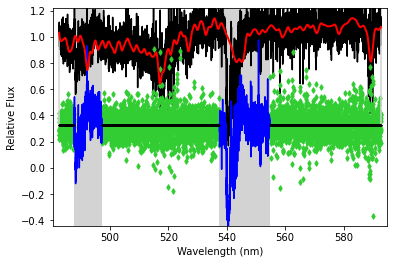

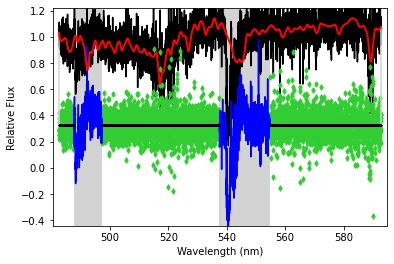

<Figure size 432x288 with 0 Axes>

In [33]:
spec_r.cal_veldis(temp_spec=temp_spec_r, degree=[5, 18], mask_reg=mask_reg, show_weight=True, moments=2)

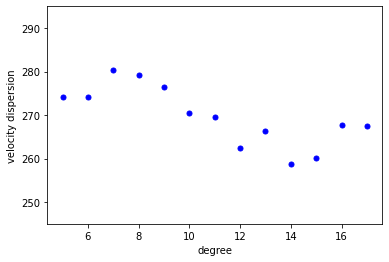

In [36]:
spec_r.plot_veldis(ylim=[245, 295])

order : 8


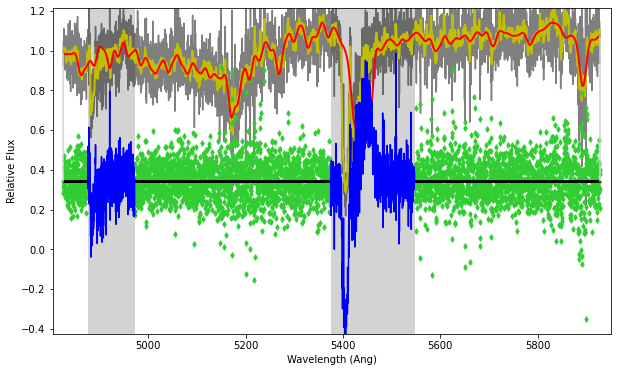

order : 12


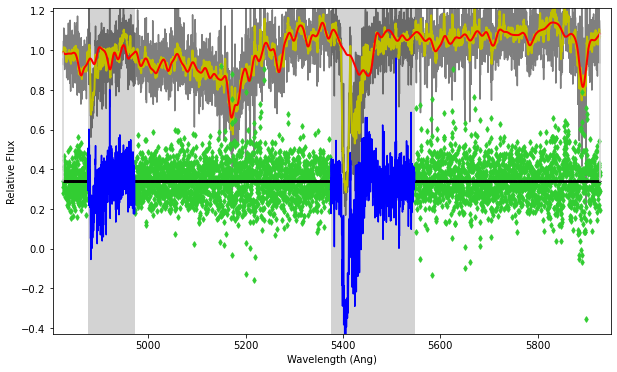

order : 16


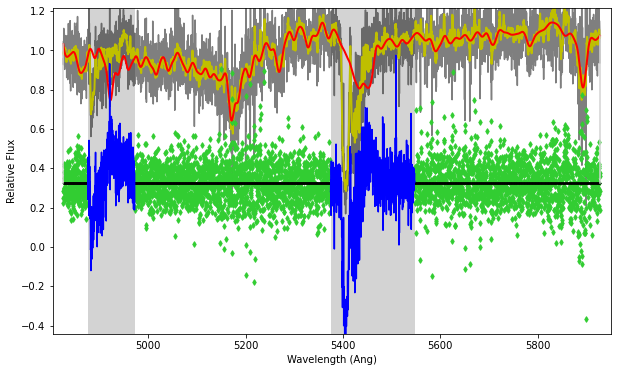

In [37]:
ord_list = np.array([8, 12, 16])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_r.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

## Results

## Systematic uncertainty

### Systematic uncertainty is calculated by changing wavelength range used to fit for velocity dispersion, degree of additive polynomial and template set. There are three choice for wavelength range- full spectrum, blue side half and red side half.

In [66]:
veldis_array = []
discard_veldis = []

In [68]:
## full spectrum

addtive_deg_full = np.arange(7, 18)

for d in addtive_deg_full:
    for i in range(10):
        temp_choice = np.random.choice(temp_spec.shape[1], size=600, replace=False)
        spec.cal_veldis(temp_spec=temp_spec[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec.vel_dis[0])
        else:
            veldis_array.append(spec.vel_dis[0])


degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 12

degree : 12

degree : 12

degree : 12

degree : 12

degree : 12

degree : 12

degree : 12

degree : 12

degree : 12

degree : 13

degree : 13

degree : 13

degree : 13

degree : 13

degree : 13

degree : 13

degree : 13

degree : 13

degree : 13

degree : 14

degree : 14

degree : 14

degree : 14

degree : 14

degree : 14

degree : 14

degree : 14

degree : 14

de

In [71]:
## blue side
addtive_deg_b = np.arange(4, 14)

for d in addtive_deg_b:
    for i in range(10):
        temp_choice = np.random.choice(temp_spec_b.shape[1], size=600, replace=False)
        spec_b.cal_veldis(temp_spec=temp_spec_b[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_b.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_b.vel_dis[0])
        else:
            veldis_array.append(spec_b.vel_dis[0])


degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 12

degree

In [75]:
## red side
addtive_deg_r = np.arange(4, 14)

for d in addtive_deg_r:
    for i in range(10):
        temp_choice = np.random.choice(temp_spec_r.shape[1], size=600, replace=False)
        spec_r.cal_veldis(temp_spec=temp_spec_r[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_r.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_r.vel_dis[0])
        else:
            veldis_array.append(spec_r.vel_dis[0])


degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 12

degree

(array([ 1.,  3.,  7., 17., 13., 23., 21.,  9.,  6.,  3.,  2.,  2.,  2.,
        13., 10., 33., 30., 24., 14.,  7.,  9., 10., 13.,  8., 10., 10.,
         4.,  5.,  6.,  1.]),
 array([243.22445919, 244.87340793, 246.52235667, 248.17130541,
        249.82025414, 251.46920288, 253.11815162, 254.76710036,
        256.4160491 , 258.06499784, 259.71394658, 261.36289532,
        263.01184406, 264.6607928 , 266.30974154, 267.95869027,
        269.60763901, 271.25658775, 272.90553649, 274.55448523,
        276.20343397, 277.85238271, 279.50133145, 281.15028019,
        282.79922893, 284.44817767, 286.0971264 , 287.74607514,
        289.39502388, 291.04397262, 292.69292136]),
 <BarContainer object of 30 artists>)

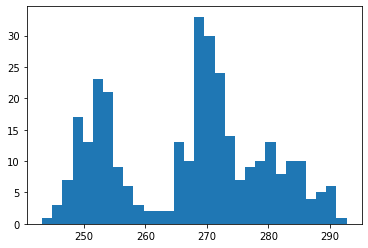

In [81]:
plt.hist(veldis_array, bins=30)

In [85]:
np.savetxt('J1433_systematic_veldis.txt', np.array(veldis_array), fmt='%f')

### Measured systematic uncertainty

In [84]:
print('systematic uncertainty for population : %d km/s' % int(np.std(veldis_array)))
print('systematic uncertainty for sample : %d km/s' % int(np.std(veldis_array, ddof=1)))

systematic uncertainty for population : 12 km/s
systematic uncertainty for sample : 12 km/s


## The velocity dispersion value that to be reported is measured using all templates and additive polynomial with degree 12. The degree of the polynomial is decided based on the length of the spectrum which in this case around 3000Ang. 


degree : 12
 Best Fit:       Vel     sigma
 comp.  0:        30       268
chi2/DOF: 1.142; degree = 12; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 1268


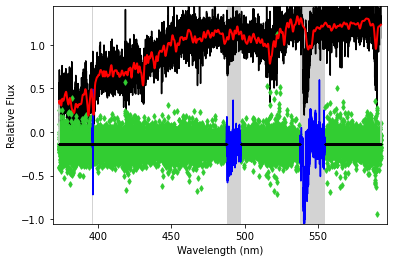

<Figure size 432x288 with 0 Axes>

In [86]:
spec.cal_veldis(temp_spec=temp_spec, degree=[12, 13], mask_reg=mask_reg, show_weight=True, moments=2)

## store best fit data and good pixel values for future use

In [87]:
gdpix = np.pad(spec.goodpixels[0], (0, len(spec.best_fit[0])- len(spec.goodpixels[0])))
np.savetxt('J1433_bestfit_veldis.txt', np.array([spec.best_fit[0], gdpix]), fmt='%f')

In [88]:
fit_data = np.loadtxt('J1433_bestfit_veldis.txt')

6172.041760958468 6179.080538943653
7595.998248123404 7745.792451807243
8373.506386679395 8642.748111712224


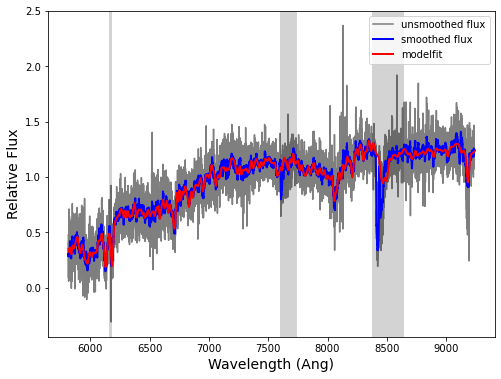

In [106]:
plt.figure(figsize=(8,6))
boxsize=15
x = np.exp(spec.wav_rebinned)*1.558
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
plt.xlabel(r"Wavelength (Ang)", fontsize=14)
plt.ylabel("Relative Flux", fontsize=14)
plt.plot(x, gal_rebinn['flux'], color='k', label='unsmoothed flux', alpha=0.5)
plt.plot(x, gal_smooth, color='b', linewidth=2, label='smoothed flux')
plt.plot(x, bst, 'r', linewidth=2, label='modelfit')
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray')
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
plt.axvspan(6162, 6182, facecolor='lightgray')
plt.legend()